<a href="https://colab.research.google.com/github/marianoInsa/ONE-TelecomX/blob/main/Challenge-TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración del Entorno

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

sns.set_theme()

# Fase 1: Extracción (Extract)

In [48]:
def extraer_datos(url: str) -> pd.DataFrame | None:
    """
    Descarga los datos desde la API y devuelve un DataFrame.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()

        data = json.loads(response.text)

        df = pd.DataFrame(data)
        print(f"✅ Datos extraídos con éxito. \nDimensiones: {df.shape}")
        return df
    except Exception as e:
        print(f"❌ Error en extracción: {e}")
        return None


In [49]:
raw_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

raw_df = extraer_datos(raw_url)

✅ Datos extraídos con éxito. 
Dimensiones: (7267, 6)


## Conociendo el Data Set

In [50]:
raw_df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   str   
 1   Churn       7267 non-null   str   
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(4), str(2)
memory usage: 340.8+ KB


In [51]:
raw_df.dtypes

customerID       str
Churn            str
customer      object
phone         object
internet      object
account       object
dtype: object

In [52]:
raw_df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [53]:
raw_df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [54]:
raw_df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,0002-ORFBO,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


# Fase 2: Transformación (Transform)

## Limpieza Estructural

### Normalización

In [55]:
def normalizar_datos(df: pd.DataFrame, column_names: list) -> pd.DataFrame | None:
    """
    Normaliza los datos en las columnas especificadas y devuelve un nuevo DataFrame.
    Reemplaza puntos por guiones bajos y convierte nombres a minúsculas (snake_case).
    """
    try:
        missing_cols = [col for col in column_names if col not in df.columns]
        if missing_cols:
            print(f"❌ Columnas no encontradas: {missing_cols}")
            return None
        
        # columnas que no se van a normalizar
        non_nested_cols = [col for col in df.columns if col not in column_names]
        normalized_df = df[non_nested_cols].copy()

        for column_name in column_names:
            # normaliza la columna
            normalized_segment = pd.json_normalize(df[column_name])

            # agregar prefijos y limpiar nombres
            normalized_segment.columns = [
                f"{column_name}_{col}".replace('.', '_').lower() 
                for col in normalized_segment.columns
            ]

            # alinear índices
            normalized_segment.index = normalized_df.index

            # concatenar el segmento normalizado con el df principal
            normalized_df = pd.concat([normalized_df, normalized_segment], axis=1)

        print(f"✅ Datos normalizados con éxito. \nDimensiones: {normalized_df.shape}")
        return normalized_df
    except Exception as e:
        print(f"❌ Error en normalización: {e}")
        return None


In [56]:
normalized_df = normalizar_datos(raw_df, ["customer", "phone", "internet", "account"])

✅ Datos normalizados con éxito. 
Dimensiones: (7267, 21)


In [57]:
normalized_df.head()

,customerID,Churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Manejo de Tipos

In [58]:
normalized_df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [59]:
normalized_df.dtypes

customerID                       str
Churn                            str
customer_gender                  str
customer_seniorcitizen         int64
customer_partner                 str
customer_dependents              str
customer_tenure                int64
phone_phoneservice               str
phone_multiplelines              str
internet_internetservice         str
internet_onlinesecurity          str
internet_onlinebackup            str
internet_deviceprotection        str
internet_techsupport             str
internet_streamingtv             str
internet_streamingmovies         str
account_contract                 str
account_paperlessbilling         str
account_paymentmethod            str
account_charges_monthly      float64
account_charges_total            str
dtype: object

El campo "account_charges_total" es de tipo "str", pero debería ser "float64"

In [60]:
def reemplazar_espacios_en_blanco(df: pd.DataFrame, column_name: str, string: str = None) -> pd.DataFrame | None:
    """
    Reemplaza las espacios en blanco en una columna con un string dado o NaN.
    """
    if df is None:
        print(f"❌ Error: El DataFrame de entrada es None.")
        return None

    df_copy = df.copy()

    if string is None:
        df_copy[column_name] = df_copy[column_name].replace(' ', np.nan)
        print(f"✅ espacios en blanco reemplazadas con NaN en la columna '{column_name}'.")

    else:
        df_copy[column_name] = df_copy[column_name].replace(' ', string)
        print(f"✅ espacios en blanco reemplazadas con '{string}' en la columna '{column_name}'.")

    return df_copy

In [61]:
def convertir_tipo_columna(df: pd.DataFrame, column_name: str, new_type: type) -> pd.DataFrame | None:
    """
    Convierte el tipo de una columna específica en un nuevo tipo.
    """
    try:
        if df is None:
            print(f"❌ Error: El DataFrame de entrada es None.")
            return None

        # primero elimino espacios en blanco
        # si 'new_type' es decimal, el string es '0.0'
        df = reemplazar_espacios_en_blanco(df, column_name, '0.0')

        if df is None:
            print(f"❌ Error en conversión de tipo: reemplazar_espacios_en_blanco devolvió None.")
            return None

        # convertir columna a numerico, convirtiendo los errores a NaN
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

        # convertir al nuevo tipo específico
        df[column_name] = df[column_name].astype(new_type)

        print(f"✅ Tipo de columna '{column_name}' convertido a '{new_type}'.")
        return df

    except Exception as e:
        print(f"❌ Error en conversión de tipo: {e}")
        return None

In [62]:
normalized_df = convertir_tipo_columna(normalized_df, "account_charges_total", np.float64)

✅ espacios en blanco reemplazadas con '0.0' en la columna 'account_charges_total'.
✅ Tipo de columna 'account_charges_total' convertido a '<class 'numpy.float64'>'.


In [63]:
normalized_df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [64]:
normalized_df.dtypes

customerID                       str
Churn                            str
customer_gender                  str
customer_seniorcitizen         int64
customer_partner                 str
customer_dependents              str
customer_tenure                int64
phone_phoneservice               str
phone_multiplelines              str
internet_internetservice         str
internet_onlinesecurity          str
internet_onlinebackup            str
internet_deviceprotection        str
internet_techsupport             str
internet_streamingtv             str
internet_streamingmovies         str
account_contract                 str
account_paperlessbilling         str
account_paymentmethod            str
account_charges_monthly      float64
account_charges_total        float64
dtype: object

In [65]:
normalized_df.head()

,customerID,Churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


### Manejo de nulos

In [66]:
normalized_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [67]:
normalized_df.isna().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64

In [68]:
def eliminar_nulos(df: pd.DataFrame, column_name: str) -> pd.DataFrame | None:
    """
    Elimina los registros con valores nulos en una columna específica.
    """
    try:
        if df is None:
            print(f"❌ Error: El DataFrame de entrada es None.")
            return None
        
        nulos = df[column_name].isna().sum()
        if nulos == 0:
            print(f"✅ No hay registros nulos en la columna '{column_name}'.")
            return df

        print(f"ℹ️ Registros nulos en la columna '{column_name}': {nulos}")


        # reemplazo los nulos por "0.0"
        df[column_name] = df[column_name].fillna("0.0")

        # transformo los datos a float64
        df[column_name] = df[column_name].astype(np.float64)

        print(f"✅ Registros nulos en la columna '{column_name}' eliminados.")
        return df
    except Exception as e:
        print(f"❌ Error en eliminación de nulos: {e}")
        return None

In [69]:
normalized_df = eliminar_nulos(normalized_df, "account_charges_total")
normalized_df.isna().sum()

✅ No hay registros nulos en la columna 'account_charges_total'.


customerID                   0
Churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64

In [70]:
normalized_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [71]:
normalized_df.tail()

,customerID,Churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


## Validación y Estandarización del Contenido

### Validación: Valores Únicos

In [72]:
def verificar_valores_unicos(df: pd.DataFrame) -> None:
    """
    Verifica si hay valores únicos en un DataFrame
    Salida: Columna: [valores únicos]
    """
    for column in df.columns:
        unique_values = df[column].unique()
        # imprime los valores entre comillas
        print(f"Columna: {column} | Valores únicos: {', '.join(map(str, unique_values))}")
        print()

verificar_valores_unicos(normalized_df)


Columna: customerID | Valores únicos: 0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKFF, 0013-EXCHZ, 0013-MHZWF, 0013-SMEOE, 0014-BMAQU, 0015-UOCOJ, 0016-QLJIS, 0017-DINOC, 0017-IUDMW, 0018-NYROU, 0019-EFAEP, 0019-GFNTW, 0020-INWCK, 0020-JDNXP, 0021-IKXGC, 0022-TCJCI, 0023-HGHWL, 0023-UYUPN, 0023-XUOPT, 0027-KWYKW, 0030-FNXPP, 0031-PVLZI, 0032-PGELS, 0036-IHMOT, 0040-HALCW, 0042-JVWOJ, 0042-RLHYP, 0047-ZHDTW, 0048-LUMLS, 0048-PIHNL, 0052-DCKON, 0052-YNYOT, 0056-EPFBG, 0057-QBUQH, 0058-EVZWM, 0060-FUALY, 0064-SUDOG, 0064-YIJGF, 0067-DKWBL, 0068-FIGTF, 0071-NDAFP, 0074-HDKDG, 0076-LVEPS, 0078-XZMHT, 0080-EMYVY, 0080-OROZO, 0082-LDZUE, 0082-OQIQY, 0083-PIVIK, 0089-IIQKO, 0093-EXYQL, 0093-XWZFY, 0094-OIFMO, 0096-BXERS, 0096-FCPUF, 0098-BOWSO, 0100-DUVFC, 0103-CSITQ, 0104-PPXDV, 0106-GHRQR, 0106-UGRDO, 0107-WESLM, 0107-YHINA, 0111-KLBQG, 0112-QAWRZ, 0112-QWPNC, 0114-IGABW, 0114-PEGZZ, 0114-RSRRW, 0115-TFERT, 0117-LFRMW, 0118-JPNOY, 0120-YZLQA, 0121-SNYRK, 0122-OAHPZ, 0123-CRBRT, 0125-LZQXK, 01

In [73]:
normalized_df['Churn'].unique()

<StringArray>
['No', 'Yes', '']
Length: 3, dtype: str

Se detectaron valores inconsistentes en la columna "Churn"

**Fundamentación:** El valor vacío _''_ en la columna 'Churn' es un problema crítico: si no sabemos si el cliente se fue o se quedó, esa fila no sirve para entrenar un modelo predictivo.

In [74]:
def limpiar_valores_invalidos(df: pd.DataFrame, column_name: str, valid_values: list, drop_invalid: bool = True) -> pd.DataFrame:
    """
    Limpia valores inválidos de una columna.
    """
    # identificar valores inválidos (strings vacíos y valores fuera del conjunto válido)
    invalid_mask = (
        (df[column_name].astype(str).str.strip() == '') | 
        (~df[column_name].isin(valid_values))
    )
    
    invalid_count = invalid_mask.sum()
    
    if invalid_count == 0:
        print(f"✅ No se encontraron valores inválidos en '{column_name}'")
        return df
    
    print(f"⚠️ Se detectaron {invalid_count} valores inválidos en '{column_name}'")
    
    if drop_invalid:
        # eliminar filas con valores inválidos
        cleaned_df = df[~invalid_mask].copy()
        print(f"✅ Filas eliminadas. Dimensiones: {df.shape} → {cleaned_df.shape}")
    else:
        # reemplazar valores inválidos con NaN
        cleaned_df = df.copy()
        cleaned_df.loc[invalid_mask, column_name] = np.nan
        print(f"✅ Valores inválidos reemplazados con NaN")
    
    return cleaned_df


In [75]:
# definir valores válidos para la columna 'Churn'
valid_churn_values = ['No', 'Yes']

# limpiar valores inconsistentes
validated_df = limpiar_valores_invalidos(
    df=normalized_df, 
    column_name='Churn', 
    valid_values=valid_churn_values, 
    drop_invalid=True
)


⚠️ Se detectaron 224 valores inválidos en 'Churn'
✅ Filas eliminadas. Dimensiones: (7267, 21) → (7043, 21)


In [76]:
# Verificar resultado
validated_df['Churn'].unique()


<StringArray>
['No', 'Yes']
Length: 2, dtype: str

### Estandarización: Conversión de Texto a Binario

In [77]:
def mapear_a_binario(df: pd.DataFrame, column_name: str, mapping: dict = None) -> pd.DataFrame:
    """
    Mapea valores textuales a valores binarios.
    """
    if df is None:
        print(f"❌ Error: El DataFrame de entrada es None.")
        return None
    
    if mapping is None:
        mapping = {'Yes': 1, 'No': 0} # mapeo por defecto
    
    transformed_df = df.copy()
    
    transformed_df[column_name] = transformed_df[column_name].map(mapping)
    
    unmapped_count = transformed_df[column_name].isna().sum()
    if unmapped_count > 0:
        print(f"⚠️ Advertencia: {unmapped_count} valores no se pudieron mapear en '{column_name}'")
        
    else:
        print(f"✅ Mapeo exitoso en '{column_name}': {mapping}")
        print(f"Valores únicos resultantes: {sorted(transformed_df[column_name].unique())}")
    
    return transformed_df

#### Columna 'Churn'

In [78]:
transformed_df = mapear_a_binario(
    df=validated_df, 
    column_name='Churn', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'Churn': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


#### Columna 'customer_partner'

In [79]:
transformed_df = mapear_a_binario(
    df=transformed_df, 
    column_name='customer_partner', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'customer_partner': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


#### Columna 'customer_dependents'

In [80]:
transformed_df = mapear_a_binario(
    df=transformed_df, 
    column_name='customer_dependents', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'customer_dependents': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


#### Columna 'phone_phoneservice'

In [81]:
transformed_df = mapear_a_binario(
    df=transformed_df, 
    column_name='phone_phoneservice', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'phone_phoneservice': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


## Crear la columna "Cuentas_Diarias"

Utilizar la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [82]:
def crear_columna_cuentas_diarias(df: pd.DataFrame, monthly_column: str, new_column: str = 'Cuentas_Diarias', days_per_month: float = 30.0) -> pd.DataFrame:
    """
    Calcula el valor diario a partir de la facturación mensual.
    """
    try:
        if df is None:
            print(f"❌ Error: El DataFrame de entrada es None.")
            return None
        
        if monthly_column not in df.columns:
            print(f"❌ Error: La columna '{monthly_column}' no existe en el DataFrame.")
            return None

        df_with_daily = df.copy()
        
        # calcular facturación diaria
        df_with_daily[new_column] = df_with_daily[monthly_column] / days_per_month
        
        # redondear a 2 decimales
        df_with_daily[new_column] = df_with_daily[new_column].round(2)
        
        print(f"✅ Columna '{new_column}' creada exitosamente.")
        print(f"Basada en: {monthly_column} / {days_per_month} días")
        print(f"Rango de valores diarios: ${df_with_daily[new_column].min():.2f} - ${df_with_daily[new_column].max():.2f}")
        
        return df_with_daily
    
    except Exception as e:
        print(f"❌ Error al crear columna de cuentas diarias: {e}")
        return None


In [83]:
transformed_df = crear_columna_cuentas_diarias(
    df=transformed_df,
    monthly_column='account_charges_monthly',
    new_column='cuentas_diarias',
    days_per_month=30.0
)

✅ Columna 'cuentas_diarias' creada exitosamente.
Basada en: account_charges_monthly / 30.0 días
Rango de valores diarios: $0.61 - $3.96


In [84]:
# Verificar la nueva columna
transformed_df[['account_charges_monthly', 'cuentas_diarias']].head(10)

,account_charges_monthly,cuentas_diarias
0,65.60,2.19
1,59.90,2.00
2,73.90,2.46
3,98.00,3.27
4,83.90,2.80
5,69.40,2.31
6,109.70,3.66
7,84.65,2.82
8,48.20,1.61
9,90.45,3.02


# Fase 3: Carga y EDA (Load & Analysis)

## Cargar los Datos

In [85]:
def cargar_datos(format: str, cleaned_df: pd.DataFrame, path: str):
    """
    Guarda los datos listos para el análisis.
    """
    if format == 'csv':
        cleaned_df.to_csv(path, index=False)
    elif format == 'excel':
        cleaned_df.to_excel(path, index=False)
    elif format == 'json':
        cleaned_df.to_json(path, index=False)
    elif format == 'html':
        cleaned_df.to_html(path, index=False)
    elif format == 'xml':
        cleaned_df.to_xml(path, index=False)
    else:
        print(f"❌ Formato '{format}' no soportado.")
        return
    print(f"✅ Datos guardados en {path}")

In [86]:
cargar_datos("csv", transformed_df, "telecom_data_processed.csv")

✅ Datos guardados en telecom_data_processed.csv


In [87]:
df = pd.read_csv("telecom_data_processed.csv")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   str    
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   str    
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   str    
 9   internet_internetservice   7043 non-null   str    
 10  internet_onlinesecurity    7043 non-null   str    
 11  internet_onlinebackup      7043 non-null   str    
 12  internet_deviceprotection  7043 non-null   str    
 13  internet_techsupport       7043 non-null   str    
 14  int

## Análisis Descriptivo

### Distribución de los Datos

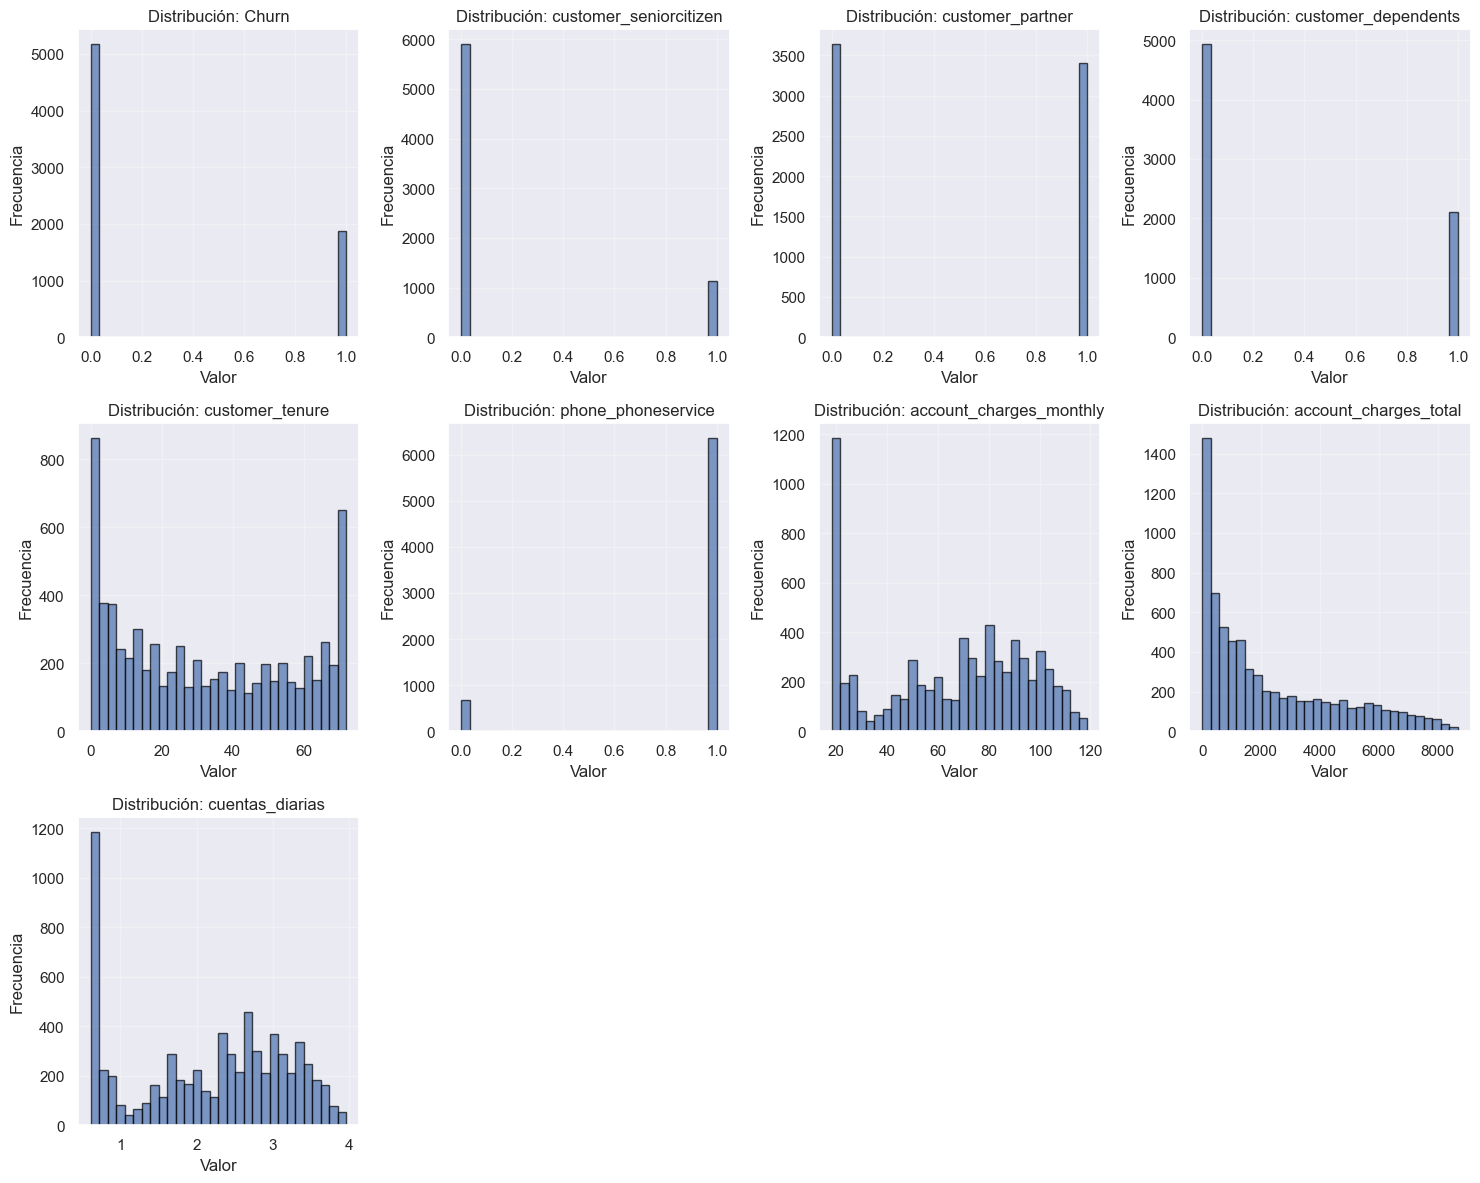

In [125]:
def visualizar_distribucion(df: pd.DataFrame) -> None:
    """
    Crea visualizaciones de la distribución de datos.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # crear subplots
    n_cols = min(4, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(numeric_cols):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución: {col}')
        axes[idx].set_xlabel('Valor')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)
    
    # ocultar ejes no usados
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

visualizar_distribucion(df)

#### Conclusiones del Gráfico de Distribución

Del análisis de los histogramas de distribución se observa:

- La mayoría de variables muestran **distribuciones asimétricas sesgadas a la derecha**, lo que indica que hay concentración de valores bajos con colas largas hacia valores altos.
- Las columnas `account_charges_monhtly`, `account_charges_total` y `cuentas_diarias` presentan una **dispersión significativa**, indicando heterogeneidad en el gasto de los clientes.
- Algunas variables numéricas (las que anteriormente hemos transformado de "Yes"/"No" a 1/0) presentan **_outliers_ (valores extremos)** que podrían requerir tratamiento especial en modelos de Machine Learning.


### Estadísticas Descriptivas

Media, mediana, desviación estándar y cuartiles.

In [110]:
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
customer_seniorcitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
customer_partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
customer_dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
customer_tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
phone_phoneservice,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
account_charges_monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
account_charges_total,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
cuentas_diarias,7043.0,2.158675,1.003088,0.61,1.18,2.34,2.99,3.96


Las diferencias entre media y mediana indican distribuciones asimétricas. En columnas donde la media es mayor que la mediana, significa que hay valores altos que tiran la media hacia arriba.

Esto es crucial para ML, ya que algunos algoritmos son sensibles a _outliers_, por lo que la mediana puede ser más robusta.

#### Skewness (Asimetría)

Es una medida de la **asimetría** de la distribución de probabilidad de una variable aleatoria de valor real en torno a su media. Mide hacia dónde se inclina la "joroba" de los datos.

- **0:** Simétrica (Normal).
- **Positiva (>0):** Cola larga a la derecha (la mayoría de los datos son pequeños).
- **Negativa (<0):** Cola larga a la izquierda (la mayoría de los datos son altos).

Es crucial porque muchos algoritmos de Machine Learning (como la regresión lineal) asumen que los datos siguen una distribución normal; si están muy sesgados, el modelo puede perder precisión.

> Nota: En variables binarias (0 y 1), la asimetría nos dice qué tan desbalanceadas están las clases.

In [ ]:
stats['skewness'] = df.select_dtypes(include=[np.number]).skew()
stats['skewness']

Churn                      1.063031
customer_seniorcitizen     1.833633
customer_partner           0.067922
customer_dependents        0.875199
customer_tenure            0.239540
phone_phoneservice        -2.727153
account_charges_monthly   -0.220524
account_charges_total      0.963235
cuentas_diarias           -0.220524
Name: skewness, dtype: float64

#### Kurtosis (Curtosis)

Es una medida de si las colas de la distribución son pesadas (>0) o ligeras (<0) en comparación con una distribución normal. Indica la presencia de _outliers_ (valores extremos) en comparación con una distribución normal. Mide qué tan "picuda" o "plana" es la distribución comparada con una normal.

- **Negativa:** Plana (Platicúrtica). Los datos están muy dispersos.
- **Positiva:** Picuda (Leptocúrtica). Los datos se concentran mucho en el centro con colas pesadas.

Es una medida importante, ya que nos ayuda a evaluar la forma de la distribución de los datos más allá de medidas simples como la media y la varianza.

In [122]:
stats['kurtosis'] = df.select_dtypes(include=[np.number]).kurtosis()
stats['kurtosis']

Churn                     -0.870211
customer_seniorcitizen     1.362596
customer_partner          -1.995953
customer_dependents       -1.234378
customer_tenure           -1.387372
phone_phoneservice         5.438908
account_charges_monthly   -1.257260
account_charges_total     -0.228580
cuentas_diarias           -1.257155
Name: kurtosis, dtype: float64

#### Coeficiente de Variación

Es una medida de qué tan grande es la desviación estándar en comparación con la media. Mide qué tan dispersos están los datos en relación con su promedio ($\sigma / \mu$). Un CV alto indica mucha variabilidad (datos poco homogéneos).

Tiene la finalidad de permitirnos comparar la **variabilidad** de dos variables que tienen unidades o escalas diferentes.

In [ ]:
numericas = df.select_dtypes(include=[np.number])
stats['cv'] = (numericas.std() / numericas.mean() * 100).round(2)
stats['cv']

Churn                      166.39
customer_seniorcitizen     227.33
customer_partner           103.46
customer_dependents        152.91
customer_tenure             75.87
phone_phoneservice          32.75
account_charges_monthly     46.46
account_charges_total       99.43
cuentas_diarias             46.47
Name: cv, dtype: float64

In [133]:
stats[['skewness', 'kurtosis', 'cv']]

,skewness,kurtosis,cv
Churn,1.063031,-0.870211,166.39
customer_seniorcitizen,1.833633,1.362596,227.33
customer_partner,0.067922,-1.995953,103.46
customer_dependents,0.875199,-1.234378,152.91
customer_tenure,0.239540,-1.387372,75.87
phone_phoneservice,-2.727153,5.438908,32.75
account_charges_monthly,-0.220524,-1.257260,46.46
account_charges_total,0.963235,-0.228580,99.43
cuentas_diarias,-0.220524,-1.257155,46.47


### Conclusiones de las Estadísticas Descriptivas

#### 1. Desbalance

El dataset tiene desbalance en el target (`Churn`), lo que complicará la predicción de los que se van. La mayoría de los clientes se quedan (skew > 1), por lo que el desbalance es moderado/alto. La clase minoritaria (los que hacen churn) es pequeña respecto al total (CV 166%), lo que genera mucha variabilidad relativa.

#### 2. Sesgos Demográficos

La variable más desbalanceada demográficamente es `SeniorCitizen`, y nos dice que los datos representan mayoritariamente a gente joven (skew > 1 y CV 227%). El modelo podría comportarse mal prediciendo churn en ancianos por falta de datos.

#### 3. Comportamiento del Cliente

La variable `tenure` a primera vista parece simétrica (skew = 0), pero la distribución es plana (kurtosis < 0). Por lo tanto, se tienes un grupo grande de clientes nuevos (tenure bajo) y un grupo grande de clientes muy fieles (tenure alto), con gente distribuida en el medio. O se van rápido o se quedan por años.

#📄Informe final